Question 1
For each element we will have to perform k multiplication and k-1 additions. Since there are n rows and m columns the total number of multiplications required are n*m*k and the total number of additions required are n*m*(k-1). The resulting matrix will be ans[n][m].

In [8]:
#Question 2
def matrix_multiply(X, Y):
    # For the dimensions of matrices X and Y
    p, q = len(X), len(X[0])
    q_, r = len(Y), len(Y[0])

    # Check if the matrices can be multiplied
    if q != q_:
        raise ValueError("Incompatible matrix dimensions for multiplication")

    # Initialize the resulting matrix Z with zeros
    Z = [[0 for _ in range(r)] for _ in range(p)]

    # Perform matrix multiplication
    for i in range(p):
        for j in range(r):
            for k in range(q):
                Z[i][j] += X[i][k] * Y[k][j]

    return Z

# Example matrices with different values
X = [[1, 2], [3, 4]]
Y = [[5, 6], [7, 8]]

result = matrix_multiply(X, Y)
print("Result using custom names:", result)


Result using custom names: [[19, 22], [43, 50]]


In [6]:
import numpy as np

def matrix_multiply_numpy(A, B):
    # Convert matrices to NumPy arrays
    A_np, B_np = np.array(A), np.array(B)

    # Perform matrix multiplication using NumPy
    C_np = np.dot(A_np, B_np)

    return C_np.tolist()  # Convert the result back to a list of lists

# Example matrices
A_np = np.array([[1, 2], [3, 4]])
B_np = np.array([[5, 6], [7,8]])

result_numpy = matrix_multiply_numpy(A_np, B_np)
print("Result using NumPy:", result_numpy)


Result using NumPy: [[19, 22], [43, 50]]


Numpy is generally faster than list of lists for matrix operation as it is optimized for mumerical computation. It uses efficient algorithms and memory layouts, which result in better performance. The difference in speed becomes more significant for larger matrices. 

Question 3

Using the method given in the question the time complexity of finding the median will be O(n logn) where n is the length of the array.
A better method for finding the median is to use a quick select algorithm, which can be done in O(n) time complexity. After sorting the array, you can easily find the median, which would be the middle element.



In [40]:
import numpy as np
import time

def find_median_multiple_passes(arr):
    """Finds the median using multiple passes through the array."""
    arr = sorted(arr)  # Sort the array
    mid = len(arr) // 2
    if len(arr) % 2 == 0:
        return (arr[mid - 1] + arr[mid]) / 2
    else:
        return arr[mid]

def find_median_quickselect(arr):
    """Finds the median using the Quickselect algorithm."""
    def quickselect(arr, left, right, k):
        if left == right:
            return arr[left]
        pivot_index = partition(arr, left, right)
        if k == pivot_index:
            return arr[k]
        elif k < pivot_index:
            return quickselect(arr, left, pivot_index - 1, k)
        else:
            return quickselect(arr, pivot_index + 1, right, k)

    def partition(arr, left, right):
        pivot = arr[right]
        i = left - 1
        for j in range(left, right):
            if arr[j] <= pivot:
                i += 1
                arr[i], arr[j] = arr[j], arr[i]
        arr[i + 1], arr[right] = arr[right], arr[i + 1]
        return i + 1

    n = len(arr)
    mid = n // 2
    return quickselect(arr, 0, n - 1, mid)

# Generate a large array for testing
arr = [3, 1, 4, 1, 5, 9, 2, 6, 5, 3, 5]
naive = find_median_multiple_passes(arr)
quickselect = find_median_quickselect(arr)
print("Median using naive method:",naive)
print("Time using naive method:",quickselect)
# Time each method
start_time = time.time()
median1 = find_median_multiple_passes(arr.copy())
end_time = time.time()
print("Multiple passes:", end_time - start_time)

start_time = time.time()
median2 = find_median_quickselect(arr.copy())
end_time = time.time()
print("Quickselect:", end_time - start_time)

start_time = time.time()
median3 = np.median(arr)
end_time = time.time()
print("NumPy median:", end_time - start_time)


Median using naive method: 4
Time using naive method: 4
Multiple passes: 4.267692565917969e-05
Quickselect: 2.4557113647460938e-05
NumPy median: 0.00016760826110839844


In [36]:
#Question 7
students_data = {
    2022: {
        'Branch 1': {
            'Roll Number': 101,
            'Name': 'Suresh',
            'Marks': {
                'Maths': 95,
                'English': 75,
                'Hindi': 90
            }
        },
        'Branch 2': {
            'Name': 'Sushant',
            'Marks': {
                'Maths': 98,
                'English': 80,
                'Hindi': 88
            }
        },
    }
}

print("Student Name in 2022, Branch 1, Roll Number 101:", students_data[2022]['Branch 1']['Name'])
print("Maths Marks in 2022, Branch 1, Roll Number 101:", students_data[2022]['Branch 1']['Marks']['Maths'])

Student Name in 2022, Branch 1, Roll Number 101: Suresh
Maths Marks in 2022, Branch 1, Roll Number 101: 95


In [20]:
#Question 8
class Student:
    def __init__(self, student_id, student_name):
        self.student_id = student_id
        self.student_name = student_name
        self.subject_marks = {}

    def add_subject_marks(self, subject, marks):
        self.subject_marks[subject] = marks


class Department:
    def __init__(self, department_name):
        self.department_name = department_name
        self.students_list = []

    def add_student(self, student):
        self.students_list.append(student)


class AcademicSession:
    def __init__(self, session_year):
        self.session_year = session_year
        self.departments_list = []

    def add_department(self, department):
        self.departments_list.append(department)


# Overall database as a list of AcademicSession objects
learning_database = []

# Create AcademicSession objects
session_2022 = AcademicSession(2022)
session_2023 = AcademicSession(2023)
session_2024 = AcademicSession(2024)
session_2025 = AcademicSession(2025)

# Create Department objects
department_1 = Department('Department 1')
department_2 = Department('Department 2')

# Create Student objects
student_2022_department_1 = Student(1, 'Suresh')
student_2022_department_1.add_subject_marks('Maths', 95)
student_2022_department_1.add_subject_marks('English', 75)
student_2022_department_1.add_subject_marks('Hindi', 90)

# Add students to departments
department_1.add_student(student_2022_department_1)

# Add departments to academic sessions
session_2022.add_department(department_1)
session_2022.add_department(department_2)

# Add academic sessions to the overall database
learning_database.append(session_2022)
learning_database.append(session_2023)
learning_database.append(session_2024)
learning_database.append(session_2025)

# Accessing data example:
print("STUDENT Name in 2022, Department 1, ID 1:", learning_database[0].departments_list[0].students_list[0].student_name)
print("Maths Marks in 2022, Department 1, ID 1:", learning_database[0].departments_list[0].students_list[0].subject_marks['Maths'])

STUDENT Name in 2022, Department 1, ID 1: Suresh
Maths Marks in 2022, Department 1, ID 1: 95


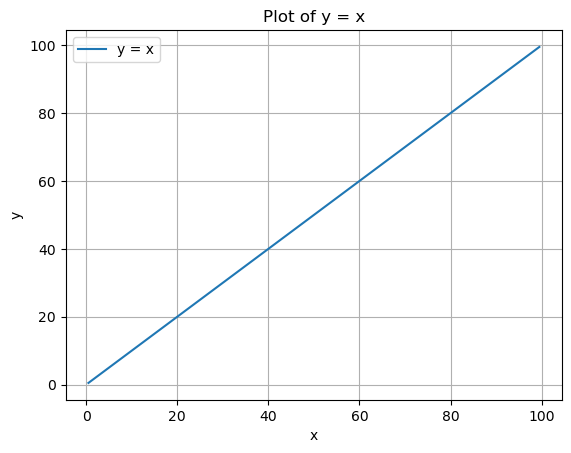

In [28]:
#Question 9
import matplotlib.pyplot as plt
import numpy as np

# Define the domain
x_values = np.arange(0.5, 100.0, 0.5)

# Calculate corresponding y values
y_values = x_values

# Plot the function
plt.plot(x_values, y_values, label='y = x')

# Add labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of y = x')

# Show grid
plt.grid(True)

# Add legend
plt.legend()

# Show the plot
plt.show() 


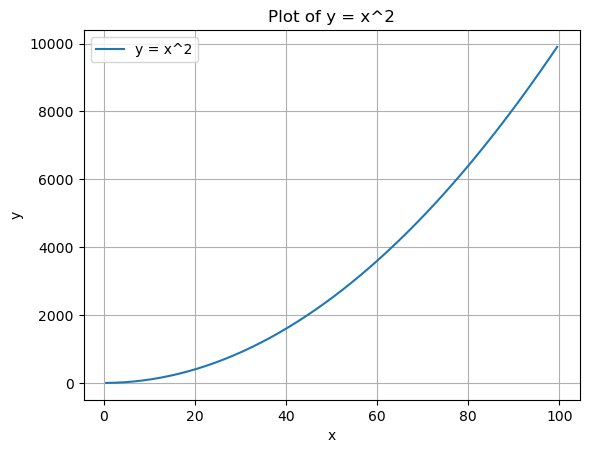

In [29]:
import matplotlib.pyplot as plt
import numpy as np

# Define the domain
x_values = np.arange(0.5, 100.0, 0.5)

# Calculate corresponding y values
y_values = x_values**2

# Plot the function
plt.plot(x_values, y_values, label='y = x^2')

# Add labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of y = x^2')

# Show grid
plt.grid(True)

# Add legend
plt.legend()

# Show the plot
plt.show()


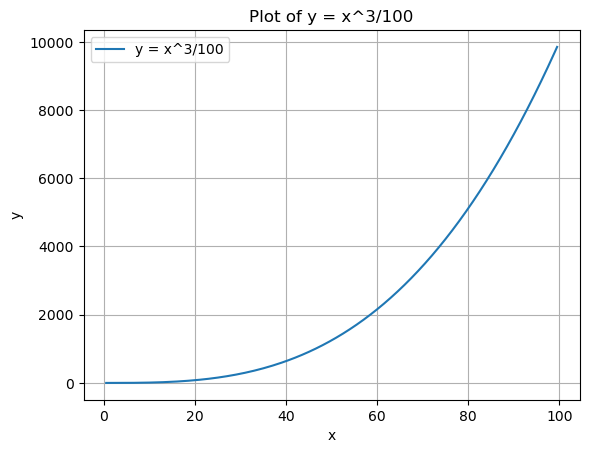

In [30]:
import matplotlib.pyplot as plt
import numpy as np

# Define the domain
x_values = np.arange(0.5, 100.0, 0.5)

# Calculate corresponding y values
y_values = (x_values**3) / 100

# Plot the function
plt.plot(x_values, y_values, label='y = x^3/100')

# Add labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of y = x^3/100')

# Show grid
plt.grid(True)

# Add legend
plt.legend()

# Show the plot
plt.show()


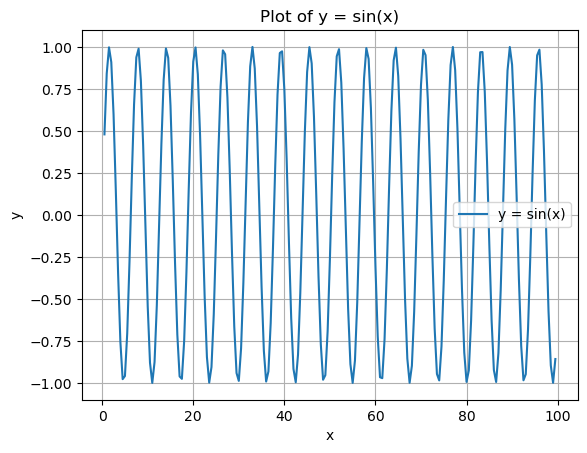

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# Define the domain
x_values = np.arange(0.5, 100.0, 0.5)

# Calculate corresponding y values
y_values = np.sin(x_values)

# Plot the function
plt.plot(x_values, y_values, label='y = sin(x)')

# Add labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of y = sin(x)')

# Show grid
plt.grid(True)

# Add legend
plt.legend()

# Show the plot
plt.show()


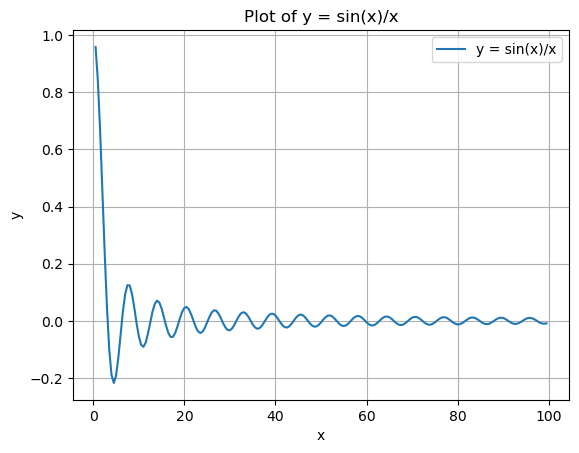

In [32]:
import matplotlib.pyplot as plt
import numpy as np

# Define the domain, excluding the singularity
x_values = np.arange(0.5, 100.0, 0.5)

# Calculate corresponding y values
y_values = np.sin(x_values) / x_values

# Plot the function
plt.plot(x_values, y_values, label='y = sin(x)/x')

# Add labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of y = sin(x)/x')

# Show grid
plt.grid(True)

# Add legend
plt.legend()

# Show the plot
plt.show()


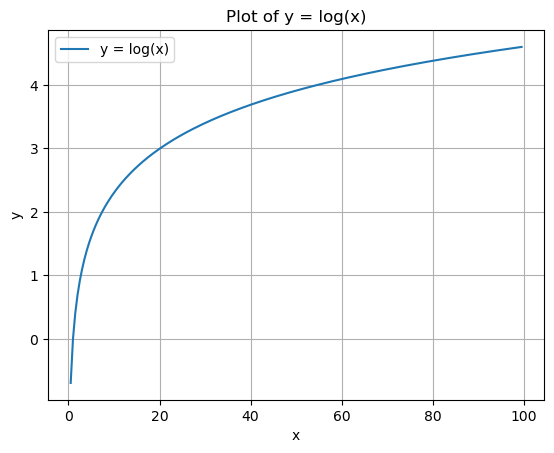

In [33]:
import matplotlib.pyplot as plt
import numpy as np

# Define the domain
x_values = np.arange(0.5, 100.0, 0.5)

# Calculate corresponding y values
y_values = np.log(x_values)

# Plot the function
plt.plot(x_values, y_values, label='y = log(x)')

# Add labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of y = log(x)')

# Show grid
plt.grid(True)

# Add legend
plt.legend()

# Show the plot
plt.show()


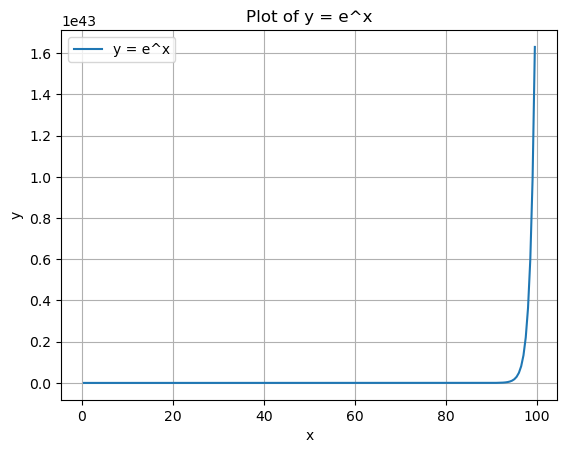

In [34]:
import matplotlib.pyplot as plt
import numpy as np

# Define the domain
x_values = np.arange(0.5, 100.0, 0.5)

# Calculate corresponding y values
y_values = np.exp(x_values)

# Plot the function
plt.plot(x_values, y_values, label='y = e^x')

# Add labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of y = e^x')

# Show grid
plt.grid(True)

# Add legend
plt.legend()

# Show the plot
plt.show()


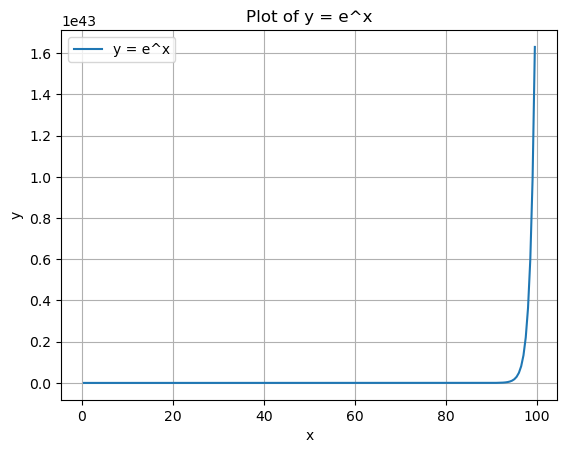

In [35]:
import matplotlib.pyplot as plt
import numpy as np

# Define the domain
x_values = np.arange(0.5, 100.0, 0.5)

# Calculate corresponding y values
y_values = np.exp(x_values)

# Plot the function
plt.plot(x_values, y_values, label='y = e^x')

# Add labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of y = e^x')

# Show grid
plt.grid(True)

# Add legend
plt.legend()

# Show the plot
plt.show()


In [ ]:
#Question 10
import numpy as np
import pandas as pd

# Generate a 20x5 matrix with random numbers drawn uniformly from the range [1, 2)
custom_matrix = np.random.uniform(1, 2, size=(20, 5))

# Create a DataFrame from the matrix with column names "x", "y", "z", "p", "q"
custom_df = pd.DataFrame(custom_matrix, columns=['x', 'y', 'z', 'p', 'q'])

# Add a new column "r" which is the sum of columns "x", "y", "z", "p", "q"
custom_df['r'] = custom_df.sum(axis=1)

# Create a column "s" with values "LT8" if "r" is less than 8, and "GT8" otherwise
custom_df['s'] = np.where(custom_df['r'] < 8, 'LT8', 'GT8')

# Find the number of rows where the value in column "s" is "LT8"
lt8_count_custom = (custom_df['s'] == 'LT8').sum()

# Find the standard deviation of column "r" for rows where "s" is "LT8" and "GT8" respectively
std_lt8_custom = custom_df.loc[custom_df['s'] == 'LT8', 'r'].std()
std_gt8_custom = custom_df.loc[custom_df['s'] == 'GT8', 'r'].std()

# Display the modified DataFrame
print("Modified DataFrame:")
print(custom_df)

# Display the results
print("\nNumber of rows where 's' is 'LT8':", lt8_count_custom)
print("Standard deviation of 'r' for rows where 's' is 'LT8':", std_lt8_custom)
print("Standard deviation of 'r' for rows where 's' is 'GT8':", std_gt8_custom)


In [26]:
#Question 12
import numpy as np

# Example 1: Broadcasting a scalar to an array
scalar = 3
array_1 = np.array([1, 2, 3, 4, 5])

result_1 = scalar * array_1

print("Custom Array 1:", array_1)
print("Custom Result 1:", result_1)

# Example 2: Broadcasting a 1D array to a 2D array
array_2d = np.array([[1, 2, 3], [4, 5, 6]])

array_1d = np.array([10, 20, 30])

result_2 = array_2d + array_1d

print("\n Array 2D:")
print(array_2d)
print("\nArray 1D:",array_1d)
print("Result 2:")
print(result_2)

Custom Array 1: [1 2 3 4 5]
Custom Result 1: [ 3  6  9 12 15]

 Array 2D:
[[1 2 3]
 [4 5 6]]

Array 1D: [10 20 30]
Result 2:
[[11 22 33]
 [14 25 36]]
